<a href="https://colab.research.google.com/github/whitehatdevelop/exercise_ml/blob/master/exercise_pre_procesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#CONEXIÓN A DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
#INGRESANDO A CARPETA CONTENEDORA DE ARCHIVOS EN DRIVE "ml_database"
%cd '/content/drive/My Drive/Colab Notebooks/ml_database'

/content/drive/My Drive/Colab Notebooks/ml_database


In [103]:
#IMPORTACIÓN DE LIBRERÍAS
import pandas as pd #IMPORTACIÓN DE LIBRERIA - PANDAS
import numpy as np

import seaborn as sn #IMPORTACIÓN DE LIBRERIA - SEABORN
import matplotlib.pyplot as plt #IMPORTACIÓN DE LIBRERIA - MATPLOT

%matplotlib inline

In [104]:
#CARGA DE ARCHIVO .CSV 
dataset = pd.read_csv('Dataset_AfiliacionDebitoAutom.csv',
                      sep=',', #DEFINIENDO SEPARADOR ',' PROPIO DE .CSV
                      encoding='utf-8', #CODIFICACIÓN UTF-8
                      na_values=' ')

In [105]:
#VISUALIZACIÓN DE ENCABEZADOS DE LAS COLUMNAS DEL DATAFRAME COMO UNA LISTA
dataset.columns.values.tolist()

['N_ACTIVE_LINES',
 'N_SUSPENDED_LINES',
 'DEBT_CAPACITY',
 'AGE',
 'INCOME',
 'OLDEST_LINE_MONTHS',
 'SAME_BILLING_3M',
 'DIGITAL_BILL',
 'MB_3G_USE',
 'MB_4G_USE',
 'VOICE_IN_3M',
 'VOICE_OUT_3M',
 'SUBSCRIPTION_FLAG']

In [106]:
#VISUALIZACIÓN DE LOS 5 PRIMEROS DATOS DEL DATAFRAME
dataset.head(5)  

,N_ACTIVE_LINES,N_SUSPENDED_LINES,DEBT_CAPACITY,AGE,INCOME,OLDEST_LINE_MONTHS,SAME_BILLING_3M,DIGITAL_BILL,MB_3G_USE,MB_4G_USE,VOICE_IN_3M,VOICE_OUT_3M,SUBSCRIPTION_FLAG
0,2,0,570,NaN,173.699997,27,1,1,0.0,0.0,0.7999,0.7999,0.0
1,1,0,80,39.0,79.000056,12,0,1,0.0,0.0,0.0000,0.0000,0.0
2,1,0,120,NaN,29.900001,5,1,1,4.9,2077.8,60.5667,81.6664,0.0
3,0,1,0,34.0,62.900000,14,1,1,9.8,17.9,101.5669,418.7003,1.0
4,1,0,186,NaN,65.899460,39,0,1,50.3,9547.0,260.8001,917.3007,1.0


# HISTOGRAMAS
Al observar los histogramas, no se puede llegar a la conclusión de encontrar una distribución gaussina, entonces se puede concluir que los datos a evaluar presentan una distribución sesgada.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


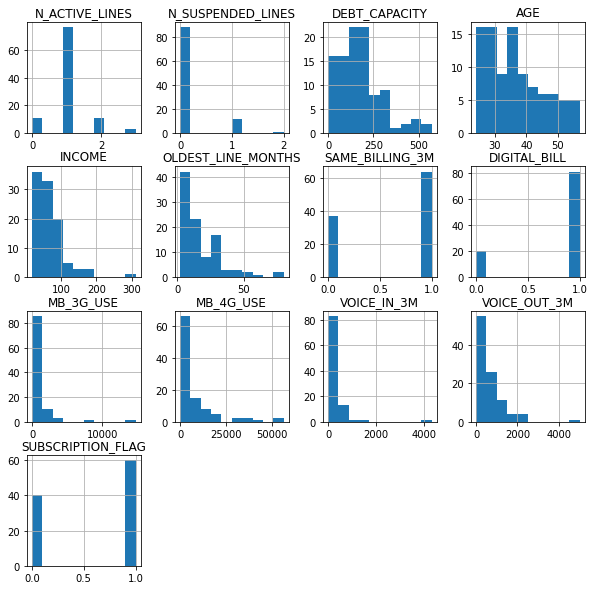

In [107]:
import matplotlib.pyplot as plt #IMPORTACIÓN DE LIBRERÍA MATPLOTLIB PARA LA VISUALIZACIÓN DE DATOS
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

# VISUALIZACIÓN DE DATOS ESTADÍSTICOS
Variable objetivo: "SUBSCRIPTION_FLAG"

## Descripción de los atributos del dataset

- N_ACTIVE_LINES = Número de líneas móviles activas del cliente.
- N_SUSPENDED_LINES = Número de líneas móviles suspendidas del cliente (sin servicio).
- DEBT_CAPACITY = Estimación de la cantidad de dinero que la persona puede pedir prestado de un banco.
- AGE = Edad del cliente.
- INCOME = Ingresos
- OLDEST_LINE_MONTHS = Número de meses que la línea más antigua del cliente ha permanecido en la compañía.
- SAME_BILLING_3M = 1 si el cliente facturó el mismo monto con la compañía, por los últimos 3 meses.
- DIGITAL_BILL = 1 si el cliente se ha suscrito al servicio de facturación digital (la factura se envía por correo electrónico en lugar de usar métodos tradicionales).
- MB_3G_USE = Cantidad de MB usados en 3G.
- MB_4G_USE = Cantidad de MB usados en 4G.
- VOICE_IN_3M =Cantidad de minutos en llamadas de voz realizadas "hacia adentro" (desde una operadora externa hacia nuestra operadora).
VOICE_OUT_3M = Cantidad de minutos en llamadas de voz realizadas "hacia afuera" (desde nuestra operadora hacia otra operadora).
SUBSCRIPTION_FLAG = 1 indica que el cliente se ha afiliado al débito automático para su facturación.

In [108]:
#VISUALIZACIÓN DE DATOS ESTADÍSTICOS DEL DATAFRAME
dataset.describe()

,N_ACTIVE_LINES,N_SUSPENDED_LINES,DEBT_CAPACITY,AGE,INCOME,OLDEST_LINE_MONTHS,SAME_BILLING_3M,DIGITAL_BILL,MB_3G_USE,MB_4G_USE,VOICE_IN_3M,VOICE_OUT_3M,SUBSCRIPTION_FLAG
count,101.000000,101.000000,101.000000,95.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,99.000000,101.000000,100.000000
mean,1.059406,0.138614,172.861386,36.463158,68.047274,17.237624,0.633663,0.801980,731.056436,7166.463366,252.033448,620.201870,0.600000
std,0.580031,0.374959,126.132948,9.120716,43.298222,15.643624,0.484206,0.400495,1781.948329,10819.287102,476.432244,724.473191,0.492366
min,0.000000,0.000000,0.000000,24.000000,18.978000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,90.000000,28.000000,41.900002,6.000000,0.000000,1.000000,21.100000,377.200000,48.491850,154.900000,0.000000
50%,1.000000,0.000000,160.000000,35.000000,62.900000,11.000000,1.000000,1.000000,167.800000,3389.500000,121.950200,418.700300,1.000000
75%,1.000000,0.000000,220.000000,43.000000,79.000056,26.000000,1.000000,1.000000,604.600000,9061.300000,306.091850,871.984500,1.000000
max,3.000000,2.000000,570.000000,57.000000,309.599459,80.000000,1.000000,1.000000,14734.000000,56071.000000,4296.182900,5014.400300,1.000000


Verficamos la cantidad de datos null por columna.

In [109]:
dataset.isnull().sum(axis=0)

N_ACTIVE_LINES        0
N_SUSPENDED_LINES     0
DEBT_CAPACITY         0
AGE                   6
INCOME                0
OLDEST_LINE_MONTHS    0
SAME_BILLING_3M       0
DIGITAL_BILL          0
MB_3G_USE             0
MB_4G_USE             0
VOICE_IN_3M           2
VOICE_OUT_3M          0
SUBSCRIPTION_FLAG     1
dtype: int64

In [110]:
#INSERTANDO MEDIANA EN VALORES NULLABLES
dataset = dataset.fillna({'AGE':dataset['AGE'].median()}) #REEMPLAZANDO DENTRO DE COLUMNA 'AGE'
dataset = dataset.fillna({'VOICE_IN_3M':dataset['VOICE_IN_3M'].median()}) #REEMPLAZANDO DENTRO DE COLUMNA 'VOICE_IN_3M'

In [110]:
#ELIMINANDO FILA CON DATO NULL CORRESPONDIENTE A "SUBSCRIPTION_FLAG"
dataset.dropna()

In [111]:
#VERIFICANDO QUE EL NÚMERO DE DATOS NULLABLES POR COLUMNA AHORA SEAN 0
dataset.isnull().sum(axis=0)

N_ACTIVE_LINES        0
N_SUSPENDED_LINES     0
DEBT_CAPACITY         0
AGE                   0
INCOME                0
OLDEST_LINE_MONTHS    0
SAME_BILLING_3M       0
DIGITAL_BILL          0
MB_3G_USE             0
MB_4G_USE             0
VOICE_IN_3M           0
VOICE_OUT_3M          0
SUBSCRIPTION_FLAG     1
dtype: int64

In [112]:
dataset.SUBSCRIPTION_FLAG.value_counts() #VISUALIZANDO CANTIDAD DENTRO DE SUBSCRIPTION_FLAG AGRUPADAS POR LOS VALORES PERTENECIENTES A LA COLUMNA

1.0    60
0.0    40
Name: SUBSCRIPTION_FLAG, dtype: int64

# BALANCEO DE DATOS


In [113]:
target_count = dataset.SUBSCRIPTION_FLAG.value_counts() #CONTEO DE SUBSCRIPTION_FLAG 0 | 1
count_unaffiliate = target_count[0] #CANTIDAD DE "NO AFILIADOS"
count_affiliate = target_count[1] #CANTIDAD DE "NO AFILIADOS"

count_affiliate,count_unaffiliate #VISUALIZANDO CANTIDADES

(60, 40)

In [114]:
#SEPARAR EN DOS DATAFRAMES EL DATASET 
dataset_unaffiliate = dataset[dataset['SUBSCRIPTION_FLAG'] == 0]
dataset_affiliate = dataset[dataset['SUBSCRIPTION_FLAG'] == 1]

Sampling aleatorio de los datos, de manera que se tenga la misma cantidad de afiliados y no afiliados.

In [115]:
#APLICANDO SOBRE-MUESTREO A LOS DATOS
dataset_affiliate_over = dataset_affiliate.sample(count_unaffiliate, replace=True) #NUEVO DATAFRAME DE "AFILIADOS" BASADO EN UNA MUESTRA DEL DATAFRAME DE "AFILIADO" DEL TAMAÑO DE LOS "NO AFILIADOS"

df_test_over = pd.concat([dataset_unaffiliate, dataset_affiliate_over], axis=0) #CONCATENANDO EL DATAFRAME "NO AFILIADO" CON EL NUEVO DATAFRAME "AFILIADOS" DEL SOBREMUESTREO

Número de afiliados y no afiliados, balanceados.

In [116]:
df_test_over.groupby('SUBSCRIPTION_FLAG').size() #EL TAMAÑO DEL DATASET QUEDA BALANCEADO AL NÚMERO DE "NO AFILIADOS"

SUBSCRIPTION_FLAG
0.0    40
1.0    40
dtype: int64

# DATOS DE ENTRENAMIENTO Y TESTING
- Subdivisiones del dataset balanceado: Conjunto de entrenamiento (train) y conjunto de pruebas (test).
- Para entrenar nuestro modelo de Machine Learning y poder saber si está funcionando bien.
- Por cada dato de test deberian haber cuatro datos de train: 20% test.


In [117]:
from sklearn.model_selection import train_test_split 
columns = df_test_over.columns.tolist() #COLUMNAS DE DATASET CONVERTIDAS EN UNA LISTA
columns = [x for x in columns if x not in ["SUBSCRIPTION_FLAG"]]  #DEFINIENDO UNA LIST COMPREHENSION

X = df_test_over[columns] #VARIABLES REGRESORAS
Y = pd.DataFrame(df_test_over['SUBSCRIPTION_FLAG'])

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=.2, #PORCENTAJE PARA TESTING
                                                    random_state=22) #FIJAR SEMILLA PARA OBTENER EL MISMO RESULTADO AL VOLVER A EJECUTAR

# NORMALIZACIÓN DE DATOS
## ¿POR QUÉ APLICAMOS ESTE ESCALONAMIENTO?
El algoritmo de red neuronal típico requiere datos que en una escala [0, 1]. Una desventaja de la normalización es que pierde cierta información en los datos, especialmente sobre los valores atípicos

In [118]:
from sklearn.preprocessing import MinMaxScaler #POR DEFECTO USA VALORES ENTRE 0-1
scaler_n = MinMaxScaler()

X_train_n = pd.DataFrame(scaler_n.fit_transform(X_train), columns=X_train.columns)
y_train_n = pd.DataFrame(scaler_n.fit_transform(y_train), columns=y_train.columns)

# IDENTIFICAR RANGO MÍNIMO Y MÁXIMO EN DATAFRAME'S DE ENTRENAMIENTO
Se comproba el rango en 0-1 para los datos de entrenamiento, se puede decir que, los datos de entrenamiento están balanceados y normalizados.

In [119]:
print('Mínimos valores en X_train_n - Dataframe normalizado')
print('*'*55)
print(X_train_n.min())
print('Máximos valores en X_train_n - Dataframe normalizado')
print('*'*55)
print(X_train_n.max())
print('*'*55)
print('Mínimos valores en y_train_n - Dataframe normalizado')
print('*'*55)
print(y_train_n.min())
print('Máximos valores en y_train_n - Dataframe normalizado')
print('*'*55)
print(y_train_n.max())

Mínimos valores en X_train_n - Dataframe normalizado
*******************************************************
N_ACTIVE_LINES        0.0
N_SUSPENDED_LINES     0.0
DEBT_CAPACITY         0.0
AGE                   0.0
INCOME                0.0
OLDEST_LINE_MONTHS    0.0
SAME_BILLING_3M       0.0
DIGITAL_BILL          0.0
MB_3G_USE             0.0
MB_4G_USE             0.0
VOICE_IN_3M           0.0
VOICE_OUT_3M          0.0
dtype: float64
Máximos valores en X_train_n - Dataframe normalizado
*******************************************************
N_ACTIVE_LINES        1.0
N_SUSPENDED_LINES     1.0
DEBT_CAPACITY         1.0
AGE                   1.0
INCOME                1.0
OLDEST_LINE_MONTHS    1.0
SAME_BILLING_3M       1.0
DIGITAL_BILL          1.0
MB_3G_USE             1.0
MB_4G_USE             1.0
VOICE_IN_3M           1.0
VOICE_OUT_3M          1.0
dtype: float64
*******************************************************
Mínimos valores en y_train_n - Dataframe normalizado
*******************

# ESTANDARIZACIÓN DE DATOS
El proceso se aplica para centrar los datos, donde la media de los valores observados es 0.
Útil para transformar atributos con una distribución gaussiana (o normal) y diferentes medias y desviaciones estándar a una distribución gaussiana estándar con una media de 0 (valores simétricos respecto a la media) y una desviación estándar de 1.

In [120]:
from sklearn.preprocessing import StandardScaler
scaler_s = StandardScaler()
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train), columns=X_train.columns)
y_train_s = pd.DataFrame(scaler_s.fit_transform(y_train), columns=y_train.columns)

In [122]:
X_train_s.head(5)

,N_ACTIVE_LINES,N_SUSPENDED_LINES,DEBT_CAPACITY,AGE,INCOME,OLDEST_LINE_MONTHS,SAME_BILLING_3M,DIGITAL_BILL,MB_3G_USE,MB_4G_USE,VOICE_IN_3M,VOICE_OUT_3M
0,0.028689,-0.386912,0.624860,1.242093,0.427423,0.715581,0.881917,0.601417,5.069375,3.838299,-0.214556,-0.379694
1,0.028689,-0.386912,-0.018181,-0.086833,-0.063836,1.342082,-1.133893,0.601417,-0.345175,0.358329,0.075287,0.515316
2,0.028689,-0.386912,0.931071,-0.932514,0.255487,0.966181,0.881917,0.601417,0.597302,1.729087,-0.302688,-0.500044
3,1.864770,-0.386912,-0.446876,2.087774,-0.311900,-0.537420,0.881917,0.601417,-0.363723,-0.673325,0.058161,0.268601
4,0.028689,-0.386912,0.732034,1.966962,0.255487,-0.036220,-1.133893,0.601417,-0.152100,0.251662,0.166072,0.632824


In [123]:
y_train_s.head(5)

,SUBSCRIPTION_FLAG
0,0.910259
1,0.910259
2,-1.098588
3,0.910259
4,-1.098588
